In [1]:
# узлы
knots = [0, 0, 0, 1, 1, 2, 2, 2]
#контрольные точки
p = [(0, 1, 1), (1, 0, 0), (0, -1, 1), (-1, 0, 0), (0, 1, 1)]

knots_len = len(knots)
n = len(p) - 1
q = len(knots) - n - 1
print('knots:%s\nn:%i\nq:%i\nknots_len:%i'%(knots, n, q, knots_len))

t_min = min(knots)
t_max = max(knots)
print('min: %i\nmax: %i'%(t_min, t_max))  

knots:[0, 0, 0, 1, 1, 2, 2, 2]
n:4
q:3
knots_len:8
min: 0
max: 2


In [21]:
#Генератор точек сплайна
def points_gen(N, t_min, t_max):
    dt = (t_max - t_min)/N
    t = t_min
    points_arr = []
    points_arr.append(t)
    for i in range(1, N):
        t = t + dt
        points_arr.append(t)
        
    return points_arr

# Расчет Стыковочной функции 1-го порядка
#####################################################
def N_1(t, knots, knots_len):
    N_1 = []
    for i in range(knots_len):
        if knots[i] <= t and t <knots[i+1]:
            N_1.append(1)
        else: 
            N_1.append(0)
    return N_1

# Расчет стыковочных функций порядка q>1
#####################################################
def N_q(t, knots, knots_len, N_prev, q):
    N_=[]
    for i in range(knots_len):
        a1 = t - knots[i]
        a2 = knots[i+q-1] - knots[i]
        if a2==0:
            A = 0
        else:
            A = a1/a2
        
        b1 = knots[i+q] - t
        b2 = knots[i+q] - knots[i+1]
        if b2==0:
            B = 0
        else:
            B = b1/b2

        N = N_prev[i] * A + N_prev[i+1] * B
        N_.append(N)
    return N_

In [22]:
# сгенерируем точки t
points = points_gen(100, t_min, t_max)
print(points)

[0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12000000000000001, 0.14, 0.16, 0.18, 0.19999999999999998, 0.21999999999999997, 0.23999999999999996, 0.25999999999999995, 0.27999999999999997, 0.3, 0.32, 0.34, 0.36000000000000004, 0.38000000000000006, 0.4000000000000001, 0.4200000000000001, 0.4400000000000001, 0.46000000000000013, 0.48000000000000015, 0.5000000000000001, 0.5200000000000001, 0.5400000000000001, 0.5600000000000002, 0.5800000000000002, 0.6000000000000002, 0.6200000000000002, 0.6400000000000002, 0.6600000000000003, 0.6800000000000003, 0.7000000000000003, 0.7200000000000003, 0.7400000000000003, 0.7600000000000003, 0.7800000000000004, 0.8000000000000004, 0.8200000000000004, 0.8400000000000004, 0.8600000000000004, 0.8800000000000004, 0.9000000000000005, 0.9200000000000005, 0.9400000000000005, 0.9600000000000005, 0.9800000000000005, 1.0000000000000004, 1.0200000000000005, 1.0400000000000005, 1.0600000000000005, 1.0800000000000005, 1.1000000000000005, 1.1200000000000006, 1.1400000000000006, 1.

In [23]:
N1 = [N_1(t, knots, knots_len) for t in points]

In [24]:
N1

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 

In [25]:
N = []
N.append(N1)
for i in range(2, q+1):
    N_i = []
    for j in range(len(points)):
        N_i.append(N_q(points[j], knots, knots_len-i, N[i-2][j], i))
    N.append(N_i)

In [26]:
N[2]

[[1.0, 0.0, 0.0, 0.0, 0.0],
 [0.9603999999999999, 0.0392, 0.0004, 0.0, 0.0],
 [0.9216, 0.0768, 0.0016, 0.0, 0.0],
 [0.8835999999999999, 0.11279999999999998, 0.0036, 0.0, 0.0],
 [0.8464, 0.1472, 0.0064, 0.0, 0.0],
 [0.81, 0.18000000000000002, 0.010000000000000002, 0.0, 0.0],
 [0.7744, 0.21120000000000003, 0.014400000000000003, 0.0, 0.0],
 [0.7395999999999999, 0.24080000000000001, 0.019600000000000003, 0.0, 0.0],
 [0.7055999999999999, 0.2688, 0.0256, 0.0, 0.0],
 [0.6724000000000001, 0.2952, 0.0324, 0.0, 0.0],
 [0.6400000000000001, 0.32, 0.039999999999999994, 0.0, 0.0],
 [0.6084, 0.34319999999999995, 0.04839999999999999, 0.0, 0.0],
 [0.5776, 0.36479999999999996, 0.057599999999999985, 0.0, 0.0],
 [0.5476, 0.3847999999999999, 0.06759999999999998, 0.0, 0.0],
 [0.5184, 0.40319999999999995, 0.07839999999999998, 0.0, 0.0],
 [0.48999999999999994, 0.42, 0.09, 0.0, 0.0],
 [0.4623999999999999, 0.4352, 0.1024, 0.0, 0.0],
 [0.4355999999999999, 0.4488, 0.11560000000000002, 0.0, 0.0],
 [0.4095999999999

In [8]:
#проверка для Стыковочных функций 3-го порядка
for i in N[2]:
    print(sum(i))

1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [9]:
# функция суммы весов
def H(N, p, n):
    h_sum = 0
    for i in range(n):
        h_sum = h_sum + N[i]*p[i][2]
    return h_sum

In [10]:
h = []
for i in range(len(points)):
    h.append(H(N[2][i], p, n+1))

In [27]:
#Веса
h

[1.0,
 0.9607999999999999,
 0.9232,
 0.8872,
 0.8528,
 0.8200000000000001,
 0.7888,
 0.7591999999999999,
 0.7311999999999999,
 0.7048000000000001,
 0.6800000000000002,
 0.6568,
 0.6352,
 0.6152,
 0.5968,
 0.58,
 0.5648,
 0.5511999999999999,
 0.5391999999999999,
 0.5287999999999999,
 0.5199999999999999,
 0.5127999999999999,
 0.5071999999999999,
 0.5031999999999999,
 0.5007999999999999,
 0.5,
 0.5008,
 0.5032,
 0.5072,
 0.5128,
 0.5200000000000001,
 0.5288000000000002,
 0.5392000000000001,
 0.5512000000000001,
 0.5648000000000002,
 0.5800000000000002,
 0.5968000000000002,
 0.6152000000000004,
 0.6352000000000004,
 0.6568000000000005,
 0.6800000000000004,
 0.7048000000000005,
 0.7312000000000005,
 0.7592000000000005,
 0.7888000000000006,
 0.8200000000000007,
 0.8528000000000009,
 0.8872000000000009,
 0.9232000000000009,
 0.960800000000001,
 0.9999999999999991,
 0.9607999999999992,
 0.9231999999999991,
 0.8871999999999991,
 0.8527999999999991,
 0.8199999999999992,
 0.7887999999999991,
 0.7

In [29]:
# функция вычисления координат точек сплайна
def r(coord, N, p, n, h):
    r_sum = 0
    for i in range(n):
        r_sum = r_sum + N[i] * p[i][coord]
    r_sum = r_sum/h
    
    return r_sum

In [32]:
X = []
for i in range(len(points)):
    x = r(0, N[2][i], p, n+1, h[i])
    X.append(x)

In [33]:
Y = []
for i in range(len(points)):
    y = r(1, N[2][i], p, n+1, h[i])
    Y.append(y)

In [34]:
X

[0.0,
 0.04079933388842632,
 0.08318890814558058,
 0.12714156898106402,
 0.1726078799249531,
 0.21951219512195122,
 0.2677484787018256,
 0.31717597471022135,
 0.36761487964989065,
 0.41884222474460836,
 0.47058823529411753,
 0.5225334957369061,
 0.5743073047858942,
 0.6254876462938881,
 0.6756032171581768,
 0.7241379310344828,
 0.7705382436260623,
 0.81422351233672,
 0.85459940652819,
 0.8910741301059003,
 0.9230769230769232,
 0.9500780031201249,
 0.9716088328075712,
 0.9872813990461051,
 0.9968051118210864,
 1.0,
 0.9968051118210862,
 0.9872813990461049,
 0.9716088328075709,
 0.9500780031201247,
 0.9230769230769227,
 0.8910741301058996,
 0.8545994065281894,
 0.8142235123367194,
 0.7705382436260617,
 0.7241379310344821,
 0.6756032171581763,
 0.6254876462938872,
 0.5743073047858932,
 0.5225334957369052,
 0.47058823529411675,
 0.4188422247446074,
 0.36761487964988954,
 0.31717597471022024,
 0.26774847870182444,
 0.2195121951219501,
 0.17260787992495197,
 0.1271415689810629,
 0.0831889081

In [35]:
Y

[1.0,
 0.9991673605328893,
 0.9965337954939341,
 0.9918845807033362,
 0.9849906191369607,
 0.975609756097561,
 0.9634888438133875,
 0.9483667017913594,
 0.9299781181619257,
 0.9080590238365495,
 0.8823529411764706,
 0.8526187576126675,
 0.8186397984886651,
 0.7802340702210663,
 0.7372654155495979,
 0.689655172413793,
 0.6373937677053824,
 0.5805515239477501,
 0.5192878338278929,
 0.4538577912254157,
 0.38461538461538425,
 0.3120124804992195,
 0.23659305993690802,
 0.1589825119236878,
 0.07987220447284281,
 -4.440892098500626e-16,
 -0.07987220447284396,
 -0.15898251192368892,
 -0.23659305993690913,
 -0.31201248049922065,
 -0.38461538461538536,
 -0.45385779122541675,
 -0.5192878338278939,
 -0.5805515239477511,
 -0.6373937677053831,
 -0.6896551724137939,
 -0.7372654155495986,
 -0.7802340702210669,
 -0.8186397984886655,
 -0.8526187576126679,
 -0.8823529411764712,
 -0.9080590238365498,
 -0.9299781181619261,
 -0.9483667017913597,
 -0.9634888438133878,
 -0.9756097560975613,
 -0.98499061913696

In [36]:
import matplotlib.pyplot as plt

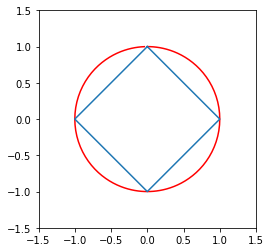

In [37]:
plt.plot(X, Y, 'r')
plt.plot([p[i][0] for i in range(len(p))], [p[i][1] for i in range(len(p))])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()